<center><h1><b><u>Observations</h1></b></u></center><hr><hr>
<center><h2>Scatter Plot</h2></center><hr>
1. From the scatter plot, it was noted that there were no majorly negative scores. Because of this, I added Russia Today.
2. The scatter plot was informative as to a general idea of how the individual compound scores reached both highs and lows, but there is too much information to make an overall statement about the data.
3. The scatter plot shows that individual compound scores reached both highs and lows, which is important to note when viewing the bar plot
4. The compound scores with neutral values crowded out each other on the scatter plot, making that unreadable.<br>
<hr>

<center><h2>Bar Plot</h2></center><hr>

1. None of the news outlets were extreme on either the positive or negative side in their average compound scores
2. BBC was slighly above neutral (0.11) on the positive side, but CBS was much more positive (0.38). Neither was overwhelmingly positive.
3. CNN and NYT were close at -0.07 and -0.08, respectively, whereas Russia Today was much moreso at -0.25.
4. While the graph appears to have extreme scores, it is due to the best fit of the scale. The actual numbers indicate that only CBS and Russia Today are further from neutral than the others.
5. Because CNN is only slightly negative, it is the most neutral out of all of the news outlets.
6. The inclusion of Russia Today in order to represent a more negative sentiment analysis may not be completely reflective of truly negative sentiment, due to the difference in culture between the Western news outlets and that of Russia. While the words are in English, the idiomatic differences in lingustic expression may not be correctly analyzed by VADER. For this exercise, however, we are taking the numbers at face value.<br>
<hr>
<center><h3><i>Post Script</center></h3><hr></i>
<i>
Re-running this program a half hour from the previous time it had been run changed the scores noticably on CNN. To use this tool to decide which news outlet is the most neutral, it must be done for more tweets over a longer period of time in order to serve a practical purpose.
</i>

In [1]:
# Dependencies
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt
import config
import numpy as np
import time
%matplotlib inline

In [2]:
# Setup Tweepy API Authentication
# My api keys are stored in a config file, instead of separately

auth = tweepy.OAuthHandler(config.api_key, config.api_secret)
auth.set_access_token(config.access_token, config.token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
#Assuming that news outlets are real, therefore not including bot removal and "is good tweet".

In [5]:
#Matt's patch to fix page x. Uncertain if necessary for only 100 tweets, but being safe & making this practice
#for future excercises that could include large volumes

class FixedAPI(tweepy.API):
    @property
    def search(self):
        """ :reference: https://dev.twitter.com/rest/reference/get/search/tweets
            :allowed_param:'q', 'lang', 'locale', 'since_id', 'geocode',
             'max_id', 'since', 'until', 'result_type', 'count',
              'include_entities', 'from', 'to', 'source'
        """
        return bind_api(
            api=self,
            path='/search/tweets.json',
            payload_type='search_results',
            allowed_param=['q', 'lang', 'locale', 'since_id', 'geocode',
                           'max_id', 'since', 'until', 'result_type',
                           'count', 'include_entities', 'from','page',
                           'to', 'source']
        )


In [6]:
#speficy news outlets
#After getting the scatter plot, there weren't any obviously negative scores, so I added Russia Today

target_user = ['@BBC','@CBS','@CNN','@nytimes', '@RT_com']

In [7]:
#set up dictionary of lists
tweet_data = {'Source':[],
               'Text':[],
               'Date':[], 
               'Compound':[],
               'Negative':[], 
               'Neutral':[],
               'Positive':[]}

#gather 100 tweets from each news outlet in list
for x in range(5):
    time.sleep(0.5)
    
    
    #do API calls
    for i in target_user:
        user_tweets = api.user_timeline(i,page=x)
        
        #Append tweet data
        for tweet in user_tweets:
            #Appending basic information required
            tweet_data['Source'].append(tweet['user']['name'])
            tweet_data['Text'].append(tweet['text'])
            tweet_data['Date'].append(tweet['created_at'])
        
            
            
            #Append sentiment score 
            score = analyzer.polarity_scores(tweet["text"])
            tweet_data['Compound'].append(score['compound'])
            tweet_data['Negative'].append(score['neg'])
            tweet_data['Neutral'].append(score['neu'])
            tweet_data['Positive'].append(score['pos'])
            

In [8]:
#look at the keys because I like to do that
#def traverse(dict_or_list, path=[]):
#    if isinstance(dict_or_list, dict):
#        iterator = dict_or_list.items()
#    else:
#        iterator = enumerate(dict_or_list)
#    for k, v in iterator:
#        yield path + [k], v
#        if isinstance(v, (dict, list)):
#            for k, v in traverse(v, path + [k]):
#                yield k, v

#for path, node in traverse(user_tweets):
#    print(path)

#Leaving this code here for posterity's sake. 
#I always like to explore the keys to gain familiarity with how to read nested dictionaries.

In [9]:
#Dataframe of sentiment
sentiment_df = pd.DataFrame(tweet_data)

In [10]:
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'])

In [11]:
#select order of display for df
sentiment_df = sentiment_df[['Source',
             'Date',
             'Text',
             'Positive',
             'Neutral',
             'Negative',
             'Compound']]

In [12]:
sentiment_df.head()

Source                Date  \
0    BBC 2018-03-26 19:03:02   
1    BBC 2018-03-26 18:24:04   
2    BBC 2018-03-26 17:30:04   
3    BBC 2018-03-26 16:25:02   
4    BBC 2018-03-26 15:45:04   

                                                Text  Positive  Neutral  \
0  Filmed in Nottingham during the worst winter f...     0.000    0.806   
1  Tonight, George Alagiah explores the fascinati...     0.312    0.688   
2  🐶😂 It was a Dachsh(und) to the finish line. ht...     0.000    1.000   
3  ✈️ Joy and Mary flew WW2 planes before any nav...     0.213    0.787   
4  Tom Cruise stars in a remake of the 1953 adapt...     0.095    0.744   

   Negative  Compound  
0     0.194   -0.6249  
1     0.000    0.7783  
2     0.000    0.0000  
3     0.000    0.5859  
4     0.161   -0.3818

In [13]:
#Create CSV from DF
sentiment_df.to_csv("sentiment.csv",sep=',')

In [14]:
#separate sentiments into different news outlets
BBC = sentiment_df[sentiment_df['Source']=='BBC']
CBS = sentiment_df[sentiment_df['Source']=='CBS']
CNN = sentiment_df[sentiment_df['Source']=='CNN']
NYT = sentiment_df[sentiment_df['Source']=='The New York Times']
RT = sentiment_df[sentiment_df['Source']=='RT']

In [15]:
#Just checking to make sure everything separated
#BBC.tail()

In [16]:
#There are 100 tweets per outlet, so choosing one outlet to set the axis
number_tweets = np.arange(-len(sentiment_df[sentiment_df["Source"] == 'BBC']), 0, 1)

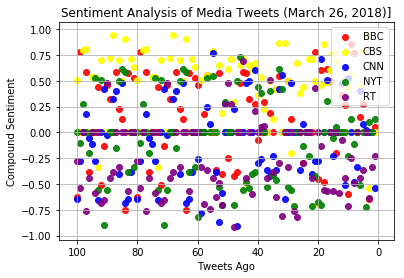

In [17]:
#Create scatter plot of compound sentiments

plt.scatter(number_tweets, BBC['Compound'], c = 'red', marker='o', alpha=0.9, label='BBC')
plt.scatter(number_tweets, CBS['Compound'], c = 'yellow', marker='o', alpha=0.9, label='CBS')
plt.scatter(number_tweets, CNN['Compound'], c = 'blue', marker='o', alpha=0.9, label='CNN')
plt.scatter(number_tweets,NYT['Compound'], c = 'green', marker='o', alpha=0.9, label='NYT')
plt.scatter(number_tweets,RT['Compound'], c = 'purple', marker='o', alpha=0.9, label = 'RT')

#adding grid            
plt.grid(True)

# x-axis labels, y-axis labels, title, legend
plt.title('Sentiment Analysis of Media Tweets (March 26, 2018)]')
plt.xlabel('Tweets Ago')
plt.ylabel('Compound Sentiment')

#There's really no good place for the legend on this crowded plot
plt.legend(loc='best')

#fix negative numbers on x-axis
plt.xticks([-100, -80, -60, -40, -20, 0],[100, 80, 60, 40, 20, 0])

#Save the plot as png
plt.savefig('scatter_of_compound.png')

In [18]:
#Calculate the mean of the compound scores in order to have one number to use for the bar plot
#Note to self: 'Compound' is the average of all the scores PER TWEET. 
#Need mean to get an overall number for the total tweets, all together. It's an average of a ton of other averages.

BBC_mean = BBC['Compound'].mean()
CBS_mean = CBS['Compound'].mean()
CNN_mean = CNN['Compound'].mean()
NYT_mean = NYT['Compound'].mean()
RT_mean = RT['Compound'].mean()

In [19]:
#Just checking
#BBC_mean

In [20]:
#axis setup
compound_list = [BBC_mean, CBS_mean, CNN_mean, NYT_mean, RT_mean]
x_axis = np.arange(len(compound_list))

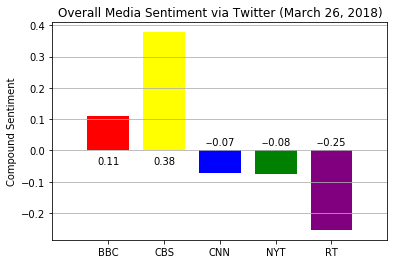

In [21]:
#bar graph of percent of overall sentiment
fig, ax = plt.subplots()
ind = x_axis

#Set graph parameters
ax.set_xticks(ind)
ax.set_title('Overall Media Sentiment via Twitter (March 26, 2018)')
ax.set_ylabel('Compound Sentiment')
ax.set_xticklabels(('BBC', 'CBS', 'CNN', 'NYT', 'RT'))
ax.set_xlim(-1, 5)

#ax.set_ylim(-1.25,1.25) - This did not work. Graph was crazy. No average scores reached the upper or lower limits.
#Used autoscaley instead. Leaving this for my future reference.

ax.set_autoscaley_on(True)

width = 0.75
#height = 1
ax.yaxis.grid(True, which='major')

#Create each bar. ind = each thing on the compound_list & is separated by news outlet
#Using same colors as scatter plot

BBC_bar = ax.bar(ind[0],BBC_mean,width, color = 'red')
CBS_bar = ax.bar(ind[1],CBS_mean,width, color = 'yellow')
CNN_bar = ax.bar(ind[2],CNN_mean,width, color = 'blue')
NYT_bar = ax.bar(ind[3],NYT_mean,width, color = 'green')
RT_bar = ax.bar(ind[4],RT_mean,width, color = 'purple')

# Label with polarity.
#Script recycled from previous homework with some values changed.
#Must view the graph prior to deciding which gets the pos and neg labels

def label_pos(rect_pos):
    for rect in rect_pos:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.0, -0.05,
         '%0.2f' % float(height),
           ha='center', va='bottom', color='black')

def label_neg(rect_neg):
    for rect in rect_neg:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.0, 0.01,
         '-%0.2f' % float(height),
           ha='center', va='bottom', color='black')

#After viewing graph, each polarity score is labeled in the correct position, depending on if it was pos or neg

#Positive scores
label_pos(BBC_bar)
label_pos(CBS_bar)

#Negative scores
label_neg(CNN_bar)
label_neg(NYT_bar)
label_neg(RT_bar)

#Save plot as png
plt.savefig('bar_plot_overall_sentiment.png')